In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/ORtg_combined_ratings.csv', index_col=0)

In [4]:
df.head()

,oORtg+_ytd,team_2,GP_ytd,oORtg+_f,GP_f,oORtg+_lastYear,GP,date,season_ytd,dORtg+_ytd,dORtg+_f,dORtg+_lastYear,nextDay_id,Lg,oORtg+_ros,dORtg+_ros
0,5.385517,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-29,2003,-7.285375,-5.047912,-3.85601,20021030SAC,87.870750,1.966514,-5.020289
1,-0.212275,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-30,2003,-20.786079,-5.047912,-3.85601,20021031SAC,96.288559,2.035622,-4.853614
2,-1.792378,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-10-31,2003,-24.971032,-5.047912,-3.85601,20021101SAC,96.517175,2.103223,-4.549834
3,30.303377,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-11-01,2003,-46.706502,-5.047912,-3.85601,20021102SAC,96.008131,1.300830,-4.006447
4,-2.641305,SAC2003,3,2.008209,82.0,4.14876,82.0,2002-11-02,2003,-11.757959,-5.047912,-3.85601,20021103SAC,97.422787,2.184773,-4.793100


In [5]:
df.shape

(74565, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74565 entries, 0 to 75065
Data columns (total 16 columns):
oORtg+_ytd         74565 non-null float64
team_2             74565 non-null object
GP_ytd             74565 non-null int64
oORtg+_f           74565 non-null float64
GP_f               74565 non-null float64
oORtg+_lastYear    74565 non-null float64
GP                 74565 non-null float64
date               74565 non-null object
season_ytd         74565 non-null int64
dORtg+_ytd         74565 non-null float64
dORtg+_f           74565 non-null float64
dORtg+_lastYear    74565 non-null float64
nextDay_id         74565 non-null object
Lg                 74565 non-null float64
oORtg+_ros         74565 non-null float64
dORtg+_ros         74565 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 9.7+ MB


In [7]:
sac03 = df[df.team_2=='SAC2003']

In [8]:
sac03.head()

,oORtg+_ytd,team_2,GP_ytd,oORtg+_f,GP_f,oORtg+_lastYear,GP,date,season_ytd,dORtg+_ytd,dORtg+_f,dORtg+_lastYear,nextDay_id,Lg,oORtg+_ros,dORtg+_ros
0,5.385517,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-29,2003,-7.285375,-5.047912,-3.85601,20021030SAC,87.870750,1.966514,-5.020289
1,-0.212275,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-30,2003,-20.786079,-5.047912,-3.85601,20021031SAC,96.288559,2.035622,-4.853614
2,-1.792378,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-10-31,2003,-24.971032,-5.047912,-3.85601,20021101SAC,96.517175,2.103223,-4.549834
3,30.303377,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-11-01,2003,-46.706502,-5.047912,-3.85601,20021102SAC,96.008131,1.300830,-4.006447
4,-2.641305,SAC2003,3,2.008209,82.0,4.14876,82.0,2002-11-02,2003,-11.757959,-5.047912,-3.85601,20021103SAC,97.422787,2.184773,-4.793100


In [9]:
sac03.team_2.unique()

array(['SAC2003'], dtype=object)

In [10]:
sac03.shape

(163, 16)

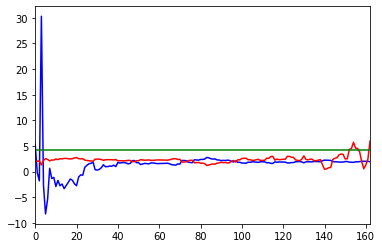

In [13]:
sac03['oORtg+_ytd'].plot(color='blue')
sac03['oORtg+_ros'].plot(color='red')
sac03['oORtg+_lastYear'].plot(color='green')

In [14]:
cols_to_keep = ['oORtg+_ytd', 'GP_ytd', 'GP_f', 'oORtg+_lastYear', 'oORtg+_ros']
sac03 = sac03[cols_to_keep]

In [16]:
sac03 = sac03.rename(columns={'oORtg+_ytd':'oortg_ytd', 'oORtg+_lastYear':'oortg_ly', 'oORtg+_ros':'oortg_ros'})

In [17]:
sac03.head()

,oortg_ytd,GP_ytd,GP_f,oortg_ly,oortg_ros
0,5.385517,1,82.0,4.14876,1.966514
1,-0.212275,1,82.0,4.14876,2.035622
2,-1.792378,2,82.0,4.14876,2.103223
3,30.303377,2,82.0,4.14876,1.300830
4,-2.641305,3,82.0,4.14876,2.184773


In [18]:
targ = sac03.oortg_ros
sac03.drop('oortg_ros', axis=1, inplace=True)

In [20]:
def mse(pred, targ): return (pred-targ).pow(2).mean()

In [21]:
def last_year(x): return x['oortg_ly']

In [22]:
ly = last_year(sac03)
mse(ly, targ)

3.884862893095265

In [23]:
def this_year(x): return x['oortg_ytd']

In [26]:
ty = this_year(sac03)
mse(ty, targ)

9.59181741935323

In [27]:
def weighted_avg(x):
    p = (x['GP_ytd']/x['GP_f'])
    return x['oortg_ytd']*p + x['oortg_ly']*(1-p)

In [28]:
wa = weighted_avg(sac03)

In [32]:
mse(wa, targ)

1.5365816550003695

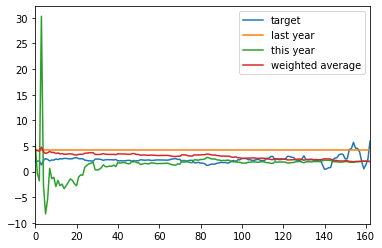

In [34]:
all_preds = pd.DataFrame({'target':targ, 'last year':ly, 'this year':ty, 'weighted average':wa})
all_preds.plot()